## Линейная регрессия - предсказание цены алмаза

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

**Задание 1 (1 балл)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [3]:
# Выведим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Пропущенные значения отсутствуют.

**Задача 2 (1 балл)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование).

Столбец "Unnamed: 0" - похож на столбец с индексами (порядковыми номерами записей датасета), нумерация не несет никакой смысловой нагрузки, соответственно этот столбец точно можно удалить.

In [4]:
data = data.drop(columns='Unnamed: 0')

**Задание 3 (1 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками. Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [5]:
# Матрица корреляций
num_data = data.select_dtypes(include=[np.number])
cor_matrix = num_data.corr()

In [6]:
# Вывод матрицы
cor_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


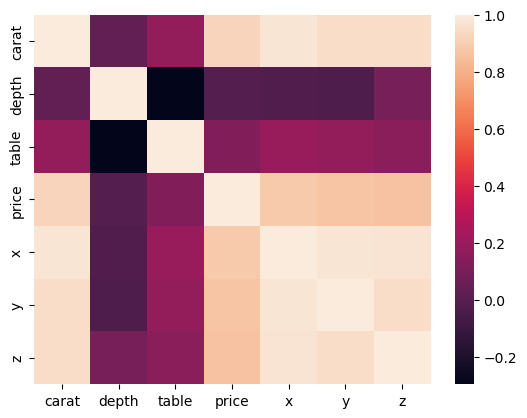

In [7]:
# Визуализация матрицы
sns.heatmap(cor_matrix)
plt.show()

С целевой переменной (price) наиболее выраженно коррелируют carat, x, y, z. Влияние параметров depth и table очень мало.

**Задание 4 (1 балл)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования (pd.get_dummies). Не забудьте поставить значение параметра drop_first равным True.

In [8]:
df_encoded = pd.get_dummies(data, drop_first=True)

In [9]:
df_encoded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


**Задание 5 (1 балл)** 
Создайте матрицу X, содержащую все признаки, и не содержащую целевую переменную price. Также создайте вектор y, содержащий целевую переменную price.

In [10]:
df_encoded.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [11]:
X = df_encoded.drop(columns='price')

In [12]:
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [13]:
y = df_encoded['price']

In [14]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

**Задание 5 (1 балл)** 
Перемешайте данные! 

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

**Задание 6 (1 балл)** Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

После применения масштабирования матрица перестает быть объектом Pandas Dataframe - решите эту проблему.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(Xtrain)
test_scaled = scaler.transform(Xtest)

In [17]:
train_scaled_df = pd.DataFrame(train_scaled, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'], index=Xtrain.index)

In [18]:
train_scaled_df

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
48184,-0.418406,1.434203,-0.204580,-0.367500,-0.414757,-0.223944,3.175292,-0.817389,-0.588544,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,1.776279,-0.457790,-0.419137,-0.542557,-0.272053,-0.321894
13092,1.397982,0.736388,-2.447368,1.407283,1.369818,1.465859,-0.314932,-0.817389,1.699108,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,2.184406,-0.419137,-0.542557,-0.272053,-0.321894
21413,1.735915,0.038572,0.692535,1.621328,1.592890,1.578512,-0.314932,-0.817389,1.699108,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,2.184406,-0.419137,-0.542557,-0.272053,-0.321894
36678,-0.587372,0.038572,-1.550253,-0.501278,-0.486140,-0.477414,-0.314932,1.223408,-0.588544,-0.535806,...,-0.423234,2.983260,-0.232729,-0.183656,1.776279,-0.457790,-0.419137,-0.542557,-0.272053,-0.321894
3853,-0.164956,-0.100991,-0.653137,0.015996,0.040310,0.015445,-0.314932,1.223408,-0.588544,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,-0.457790,2.385856,-0.542557,-0.272053,-0.321894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21225,1.017808,0.666606,-1.998810,1.077299,1.102132,1.156062,-0.314932,1.223408,-0.588544,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,-0.457790,2.385856,-0.542557,-0.272053,-0.321894
16327,2.538505,3.039179,-0.204580,1.879965,1.753502,2.254433,-0.314932,-0.817389,-0.588544,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,-0.457790,-0.419137,-0.542557,-0.272053,-0.321894
2055,-1.009788,0.596825,1.141093,-1.250433,-1.226739,-1.153335,-0.314932,-0.817389,1.699108,-0.535806,...,-0.423234,-0.335204,-0.232729,-0.183656,-0.562975,-0.457790,-0.419137,1.843126,-0.272053,-0.321894
22210,0.510909,0.875951,-1.101695,0.560025,0.709525,0.733611,-0.314932,-0.817389,-0.588544,1.866349,...,-0.423234,-0.335204,-0.232729,5.444973,-0.562975,-0.457790,-0.419137,-0.542557,-0.272053,-0.321894


In [19]:
test_scaled_df = pd.DataFrame(test_scaled, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'], index=Xtest.index)

**Задание 7 (1 балл)** Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [21]:
diamond_price_lr = LinearRegression()
diamond_price_lr.fit(train_scaled_df, ytrain)

pred_diamond_price_train = diamond_price_lr.predict(train_scaled_df)
pred_diamond_price_test = diamond_price_lr.predict(test_scaled_df)

print(f"Train R2: {r2_score(ytrain, pred_diamond_price_train)}")
print(f"Test R2: {r2_score(ytest, pred_diamond_price_test)}")

Train R2: 0.9187833742701557
Test R2: 0.9219855480613399


**Задание 8 (1 балл)** Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [22]:
coeffs = diamond_price_lr.coef_

features = Xtrain.columns
coef_df = pd.DataFrame({'Feature':features, 'Coefficient':coeffs})

coef_df

,Feature,Coefficient
0,carat,5294.413892
1,depth,-81.897489
2,table,-56.889411
3,x,-1165.812364
4,y,77.489736
5,z,-28.763074
6,cut_Good,178.192752
7,cut_Ideal,427.333445
8,cut_Premium,352.679152
9,cut_Very Good,321.856244


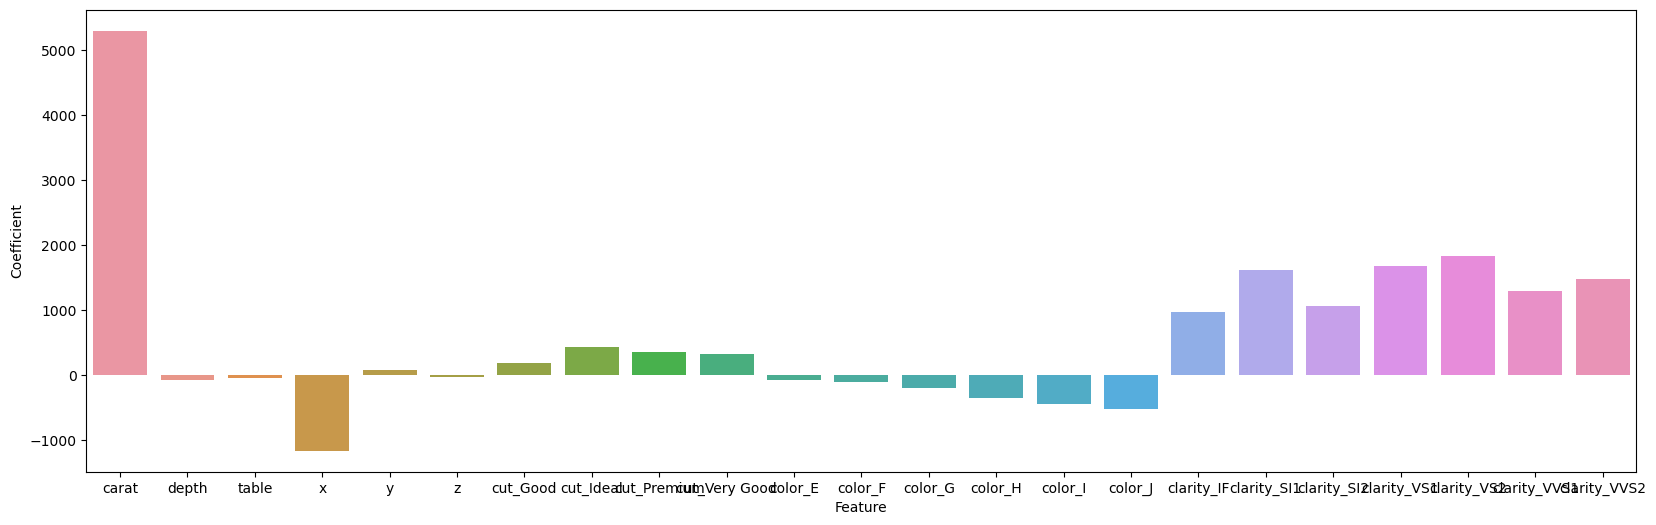

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x=coef_df['Feature'], y=coef_df['Coefficient'])
plt.show()

Признаку carat присвоен самый высокий коэффициент ~5300

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие. Поэтому за каждое из них можно получить до двух баллов.

**Задание 9* (2 балла)** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц Xtrain и Xtest признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?
Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [24]:
# Для уменьшения повторяющихся действий напишем функцию для обучения модели

def learn_data(X, y, test_size, scale=True):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=42)

    diamond_price_lr = LinearRegression()
    if scale:
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(Xtrain)
        test_scaled = scaler.fit_transform(Xtest)
        train_scaled_df = pd.DataFrame(train_scaled, columns=X.columns, index=Xtrain.index)
        test_scaled_df = pd.DataFrame(test_scaled, columns=X.columns, index=Xtest.index)
        diamond_price_lr.fit(train_scaled_df, ytrain)
        pred_diamond_price_train = diamond_price_lr.predict(train_scaled_df)
        pred_diamond_price_test = diamond_price_lr.predict(test_scaled_df)
    else:
        diamond_price_lr.fit(Xtrain, ytrain)
        pred_diamond_price_train = diamond_price_lr.predict(Xtrain)
        pred_diamond_price_test = diamond_price_lr.predict(Xtest)

    print(f"Train R2: {r2_score(ytrain, pred_diamond_price_train)}")
    print(f"Test R2: {r2_score(ytest, pred_diamond_price_test)}")

    return diamond_price_lr, Xtrain.columns

Удалим следующие признаки:
* depth - изначально было видно о слабой связи с ценой
* table - аналогично depth
* x,y,z - высокая корреляция с carat, price и между друг другом

In [25]:
df_encoded_new = df_encoded.copy()

X2 = df_encoded_new.drop(columns=['price', 'x','y','z', 'depth', 'table'])
y2 = df_encoded['price']

learn_data(X2, y2, 0.30, True)

Train R2: 0.9158450864939229
Test R2: 0.9156374126721248


(LinearRegression(),
 Index(['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
        'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
        'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
        'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
       dtype='object'))

In [26]:
lr,features2 = learn_data(X2, y2, 0.30, True)
coeffs2 = lr.coef_

coef_df2 = pd.DataFrame({'Feature':features2, 'Coefficient':coeffs2})

Train R2: 0.9158450864939229
Test R2: 0.9156374126721248


Применение или не применение масштабирования признаков заметного влияние на результат не оказывает (параметр scale в обучающей функции)

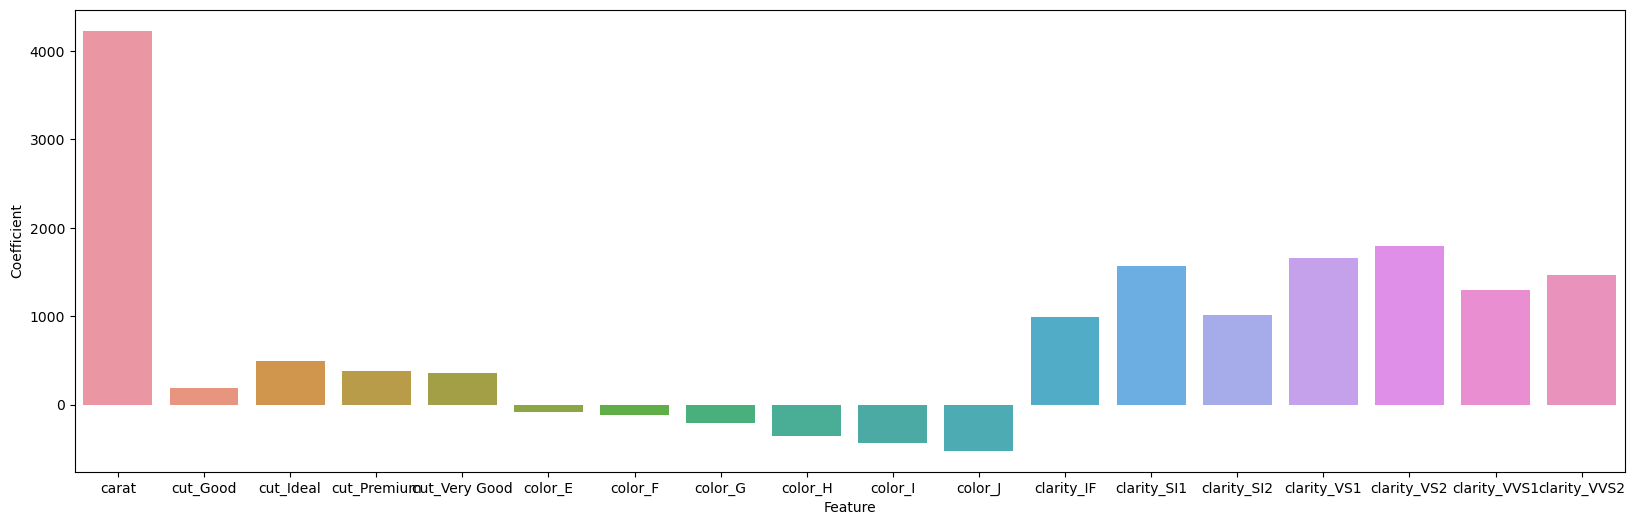

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x=coef_df2['Feature'], y=coef_df2['Coefficient'])
plt.show()

После удаления 5 фичей, качество предсказания существенно не изменилось

**Задание 10* (2 балла)** Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель (можно черпать идеи из ноутбука занятия 3). Помогло ли это улучшить качество модели?

In [28]:
# Добавим новые признаки

df_encoded_nf = df_encoded.copy()

# Произведение x,y,z
df_encoded_nf['x*y*z'] = df_encoded_nf['x'] * df_encoded_nf['y'] * df_encoded_nf['z']

# Отношение table/depth
df_encoded_nf['table/depth'] = df_encoded_nf['table'] / df_encoded_nf['depth']

# Отношение depth/carat
df_encoded_nf['depth/carat'] = df_encoded_nf['depth'] / df_encoded_nf['carat']

# Отношение table/carat
df_encoded_nf['table/carat'] = df_encoded_nf['table'] / df_encoded_nf['carat']

In [29]:
df_encoded_nf.sample(10)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,x*y*z,table/depth,depth/carat,table/carat
10636,1.20,61.6,57.0,4831,6.79,6.87,4.21,False,True,False,...,True,False,False,False,False,False,196.385133,0.925325,51.333333,47.500000
45190,0.51,62.7,54.0,1656,5.08,5.10,3.19,False,True,False,...,False,False,True,False,False,False,82.646520,0.861244,122.941176,105.882353
45116,0.71,60.0,64.0,1651,5.71,5.79,3.45,True,False,False,...,True,False,False,False,False,False,114.060105,1.066667,84.507042,90.140845
20936,1.11,62.2,54.0,9144,6.62,6.69,4.14,False,True,False,...,False,False,False,True,False,False,183.351492,0.868167,56.036036,48.648649
36346,0.42,60.1,58.0,938,4.83,4.88,2.92,False,False,False,...,False,False,False,False,False,False,68.825568,0.965058,143.095238,138.095238
29480,0.32,61.8,55.0,702,4.40,4.43,2.73,False,True,False,...,False,False,False,True,False,False,53.213160,0.889968,193.125000,171.875000
1108,0.85,62.0,57.0,2913,6.10,6.02,3.76,False,True,False,...,False,True,False,False,False,False,138.074720,0.919355,72.941176,67.058824
23614,1.51,64.2,54.0,11640,7.18,7.27,4.64,True,False,False,...,False,False,False,True,False,False,242.201504,0.841121,42.516556,35.761589
47563,0.51,61.7,58.0,1875,5.13,5.18,3.18,False,False,False,...,False,False,False,False,False,True,84.503412,0.940032,120.980392,113.725490
29654,0.35,62.1,57.0,706,4.53,4.55,2.82,False,True,False,...,False,False,False,True,False,False,58.124430,0.917874,177.428571,162.857143


In [30]:
X3 = df_encoded_nf.drop(columns=['price'])
y3 = df_encoded['price']

learn_data(X3, y3, 0.30, True)

Train R2: 0.9227091331453735
Test R2: 0.9223013338448557


(LinearRegression(),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
        'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
        'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
        'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
        'clarity_VVS2', 'x*y*z', 'table/depth', 'depth/carat', 'table/carat'],
       dtype='object'))

Train R2: 0.9227091331453735
Test R2: 0.9223013338448557


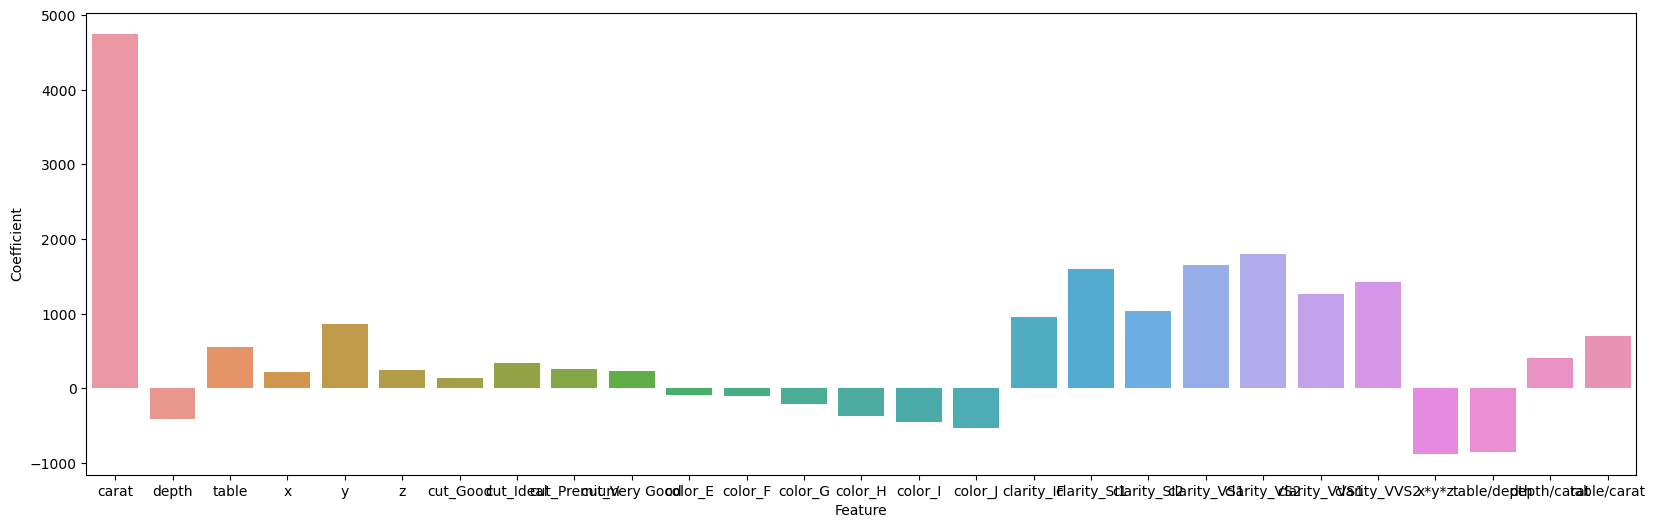

In [31]:
lr3,features3 = learn_data(X3, y3, 0.30, True)
coeffs3 = lr3.coef_

coef_df3 = pd.DataFrame({'Feature':features3, 'Coefficient':coeffs3})

plt.figure(figsize=(20,6))
sns.barplot(x=coef_df3['Feature'], y=coef_df3['Coefficient'])
plt.show()

In [32]:
coef_df3

,Feature,Coefficient
0,carat,4751.636404
1,depth,-412.028493
2,table,552.556716
3,x,223.000556
4,y,865.449556
5,z,240.773152
6,cut_Good,136.375079
7,cut_Ideal,336.716371
8,cut_Premium,259.262419
9,cut_Very Good,239.066589


R2 превысило 0.92 при добавлении новых фич, прогноз стал немного лучше.

Попробуем из дополненного датасета удалить depth, table, x,y,z, а новые признаки оставить.

In [33]:
X4 = df_encoded_nf.drop(columns=['price', 'depth', 'table', 'x','y','z'])
y4 = df_encoded['price']

learn_data(X4, y4, 0.30, True)

Train R2: 0.9219502451373811
Test R2: 0.9224076220292702


(LinearRegression(),
 Index(['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
        'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
        'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
        'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'x*y*z', 'table/depth',
        'depth/carat', 'table/carat'],
       dtype='object'))

Значительных изменений R2 не произошло.

Попробуем к последней модели применить L1 регуляризацию

In [34]:
from sklearn.linear_model import LassoCV

Xtrain_l1, Xtest_l1, ytrain_l1, ytest_l1 = train_test_split(X4, y4, test_size=0.3, random_state=42)

scaler = StandardScaler()

train_scaled_l1 = scaler.fit_transform(Xtrain_l1)
train_scaled_df = pd.DataFrame(train_scaled_l1, columns=X4.columns, index=Xtrain_l1.index)

lasso = LassoCV().fit(train_scaled_df, ytrain_l1)

important_features = X4.columns[lasso.coef_ != 0]

print("Важные признаки:", important_features)

Важные признаки: Index(['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'x*y*z', 'table/depth',
       'depth/carat', 'table/carat'],
      dtype='object')


In [35]:
len(important_features)

22

In [36]:
len(X4.columns)

22

L1 регуляризация не выявила незначительных коэффициентов

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Также (по желанию) напишите, была ли эта домашняя работа для вас интересной.

Наилучшее достигнутое качество R2 ~ 0.922, изначальное полученное значение R2 ~ 0.920.

Несущественное улучшение качества произошло после добавления дополнительных производных признаков.

Качество на мой взгляд недостаточное, хотелось бы получить R2 на уровне 0.98

Данная работа была безусловно интересной, всегда интересно работать с данными приближенными к реальной жизни и задачам, а не с искуственно сгенерированными выборками абстрактных данных.